**Revolutionizing Classification with Advanced Feature Selection and Ensemble Modeling Strategies**

In [51]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import metrics

data = pd.read_csv("heart.csv")

In [52]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [53]:
from sklearn import preprocessing
    
le = preprocessing.LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])
        
# data['is_patient'] = data['is_patient'].map({'1':0,'2':1})

In [54]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [55]:
data.shape

(918, 12)

In [56]:
data = data.dropna()
data[data < 0] = 0

# data = data.drop(['index'], axis=1)
# data = data.drop(['Patient Id'], axis=1)

In [57]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [58]:
# dividing dataset into dependent and independent features.

data_shape=data.shape
X = data.iloc[:,0:data_shape[1]-1]  #i
y = data.iloc[:,-1]    #d

X = X.astype(int)
y = y.astype(int)

In [59]:
fig = px.histogram(data, x = y)
fig.update_layout(bargap=0.8)
fig.show()

**# Starting with FEATURE SELECTION on the provided bivariate/multi-class dataset**

**SelectKBest for Feature Selection**

In [60]:
BestFeatures = SelectKBest(score_func=chi2, k='all')
fit = BestFeatures.fit(X,y)

In [61]:
fit.scores_

array([1.21285338e+02, 1.80062432e+01, 1.60736878e+02, 2.74812269e+01,
       2.98955881e+03, 5.02969830e+01, 1.21813572e+00, 6.96650396e+02,
       1.33640134e+02, 1.95500038e+02, 7.74866801e+01])

In [62]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

In [63]:
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Specs','Score'] 

In [64]:
f_Scores

,Specs,Score
0,Age,121.285338
1,Sex,18.006243
2,ChestPainType,160.736878
3,RestingBP,27.481227
4,Cholesterol,2989.558811
5,FastingBS,50.296983
6,RestingECG,1.218136
7,MaxHR,696.650396
8,ExerciseAngina,133.640134
9,Oldpeak,195.500038


In [65]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# my_plot = f_Scores.plot(x = "Specs", y = "Score", kind='barh')

fig = px.histogram(f_Scores, x = "Specs", y = "Score").update_xaxes(categoryorder='total ascending')
fig.update_layout(bargap=0.5)
fig.show()

In [66]:
topFiveUsingSelectKBest =  pd.DataFrame(f_Scores.nlargest(5,'Score'))
topFiveUsingSelectKBest

,Specs,Score
4,Cholesterol,2989.558811
7,MaxHR,696.650396
9,Oldpeak,195.500038
2,ChestPainType,160.736878
8,ExerciseAngina,133.640134


**XGBoost Classifier for Feature Selection**

In [67]:
import xgboost
import matplotlib.pyplot as plt

XGBmodel = xgboost.XGBClassifier()
XGBmodel.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [68]:
XGBdf_scores = pd.DataFrame(XGBmodel.feature_importances_)
XGBdf_columns = pd.DataFrame(X.columns)

XGBf_Scores = pd.concat([XGBdf_columns,XGBdf_scores],axis=1)               # feature scores
XGBf_Scores.columns = ['Specs','Score'] 
XGBf_Scores

,Specs,Score
0,Age,0.025424
1,Sex,0.077813
2,ChestPainType,0.106775
3,RestingBP,0.025621
4,Cholesterol,0.033517
5,FastingBS,0.062256
6,RestingECG,0.034548
7,MaxHR,0.031107
8,ExerciseAngina,0.086925
9,Oldpeak,0.032354


In [69]:
# feat_imp = pd.Series(XGBmodel.feature_importances_, index=X.columns)
# feat_imp.nlargest(10).plot(kind='barh')

# plt.figure(figsize=(8,6))
# plt.show()

fig = px.histogram(XGBf_Scores, x = "Specs", y = "Score").update_xaxes(categoryorder='total ascending')
fig.update_layout(bargap=0.5)
fig.show()

In [70]:
topFiveUsingXGB =  pd.DataFrame(XGBf_Scores.nlargest(5,'Score'))
topFiveUsingXGB

,Specs,Score
10,ST_Slope,0.483660
2,ChestPainType,0.106775
8,ExerciseAngina,0.086925
1,Sex,0.077813
5,FastingBS,0.062256


**Fisher's Score Algorithm For Feature selection**

In [71]:
from skfeature.function.similarity_based import fisher_score

NX = X.to_numpy()
Ny = y.to_numpy()

FishersScore = fisher_score.fisher_score(NX, Ny)

In [72]:
FishersScore

array([ 0,  2,  1,  3,  8,  9, 10,  5,  6,  7,  4])

In [73]:
FScoreCol = pd.DataFrame(FishersScore)
FLabelCol = pd.DataFrame(X.columns)

FishersScoreDF = pd.concat([FLabelCol,FScoreCol], axis=1)
FishersScoreDF.columns = ['Specs','Score']

FishersScoreDF

,Specs,Score
0,Age,0
1,Sex,2
2,ChestPainType,1
3,RestingBP,3
4,Cholesterol,8
5,FastingBS,9
6,RestingECG,10
7,MaxHR,5
8,ExerciseAngina,6
9,Oldpeak,7


In [74]:
# FishersImpFeat = pd.Series(FishersScore, index=X.columns)
# FishersImpFeat.nlargest(10).plot(kind='barh')

# plt.figure(figsize=(8,6))
# plt.show()


fig = px.histogram(FishersScoreDF, x = "Specs", y = "Score").update_xaxes(categoryorder='total ascending')
fig.update_layout(bargap=0.5)
fig.show()

In [75]:
topFiveUsingFishers =  pd.DataFrame(FishersScoreDF.nlargest(5,'Score'))
topFiveUsingFishers

,Specs,Score
6,RestingECG,10
5,FastingBS,9
4,Cholesterol,8
9,Oldpeak,7
8,ExerciseAngina,6


**# Ensembling the above feature selection algorithms**

In [76]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# SelectKBest
selector_kbest = SelectKBest(score_func=chi2, k='all')
selector_kbest.fit(X, y)
scores_kbest = selector_kbest.scores_

# XGBClassifier
selector_xgb = XGBClassifier()
selector_xgb.fit(X, y)
scores_xgb = selector_xgb.feature_importances_

# Create a DataFrame to store the results
df = pd.DataFrame({'Features':X.columns.array, 'scores_kbest':scores_kbest, 'scores_xgb':scores_xgb,'FishersScore':FishersScore})

# Sort the DataFrame by scores
df.sort_values(by=['scores_kbest','scores_xgb','FishersScore'], ascending=False, inplace=True)

# Select top five features
top_five_features = df.head(7)
print(top_five_features)
DataFrameWithBestFeatures=top_five_features

          Features  scores_kbest  scores_xgb  FishersScore
4      Cholesterol   2989.558811    0.033517             8
7            MaxHR    696.650396    0.031107             5
9          Oldpeak    195.500038    0.032354             7
2    ChestPainType    160.736878    0.106775             1
8   ExerciseAngina    133.640134    0.086925             6
0              Age    121.285338    0.025424             0
10        ST_Slope     77.486680    0.483660             4


In [77]:
DataFrameWithBestFeatures

,Features,scores_kbest,scores_xgb,FishersScore
4,Cholesterol,2989.558811,0.033517,8
7,MaxHR,696.650396,0.031107,5
9,Oldpeak,195.500038,0.032354,7
2,ChestPainType,160.736878,0.106775,1
8,ExerciseAngina,133.640134,0.086925,6
0,Age,121.285338,0.025424,0
10,ST_Slope,77.486680,0.483660,4


In [78]:
column_names=[]
for index, row in DataFrameWithBestFeatures.iterrows():
    column_names.append(row['Features'])

column_names.append(data.columns[-1])

In [79]:
final_data = data[column_names]

In [80]:
final_data.head()

,Cholesterol,MaxHR,Oldpeak,ChestPainType,ExerciseAngina,Age,ST_Slope,HeartDisease
0,289,172,0.0,1,0,40,2,0
1,180,156,1.0,2,0,49,1,1
2,283,98,0.0,1,0,37,2,0
3,214,108,1.5,0,1,48,1,1
4,195,122,0.0,2,0,54,2,0


In [81]:
final_data.describe()[column_names]

,Cholesterol,MaxHR,Oldpeak,ChestPainType,ExerciseAngina,Age,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,198.799564,136.809368,0.901307,0.781046,0.404139,53.510893,1.361656,0.553377
std,109.384145,25.460334,1.045100,0.956519,0.490992,9.432617,0.607056,0.497414
min,0.000000,60.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000
25%,173.250000,120.000000,0.000000,0.000000,0.000000,47.000000,1.000000,0.000000
50%,223.000000,138.000000,0.600000,0.000000,0.000000,54.000000,1.000000,1.000000
75%,267.000000,156.000000,1.500000,2.000000,1.000000,60.000000,2.000000,1.000000
max,603.000000,202.000000,6.200000,3.000000,1.000000,77.000000,2.000000,1.000000


In [82]:
fig = px.box(final_data)
fig.show()

**Starting with CLASSIFICATION on the provided bivariate/multi-class dataset**

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
shape=final_data.shape
FSX = final_data.iloc[:,0:shape[1]-1]
FSy = final_data.iloc[:,-1]

FSX = FSX.astype(int)
FSy = FSy.astype(int)

FSX

,Cholesterol,MaxHR,Oldpeak,ChestPainType,ExerciseAngina,Age,ST_Slope
0,289,172,0,1,0,40,2
1,180,156,1,2,0,49,1
2,283,98,0,1,0,37,2
3,214,108,1,0,1,48,1
4,195,122,0,2,0,54,2
...,...,...,...,...,...,...,...
913,264,132,1,3,0,45,1
914,193,141,3,0,0,68,1
915,131,115,1,0,1,57,1
916,236,174,0,1,0,57,1


In [85]:
FSX_train, FSX_test, FSy_train, FSy_test = train_test_split(FSX,FSy, test_size=0.3)

**Using SVM**

In [86]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
SVMmodel = make_pipeline(StandardScaler(), SVC(gamma='auto'))

SVMmodel.fit(FSX_train,FSy_train)
y_pred=SVMmodel.predict(FSX_test)

In [87]:
FSy_test.head(20)

293    1
682    1
301    0
591    0
835    1
427    1
81     0
299    1
783    0
814    1
245    0
456    1
368    1
85     1
550    1
552    1
664    1
803    0
527    0
629    0
Name: HeartDisease, dtype: int32

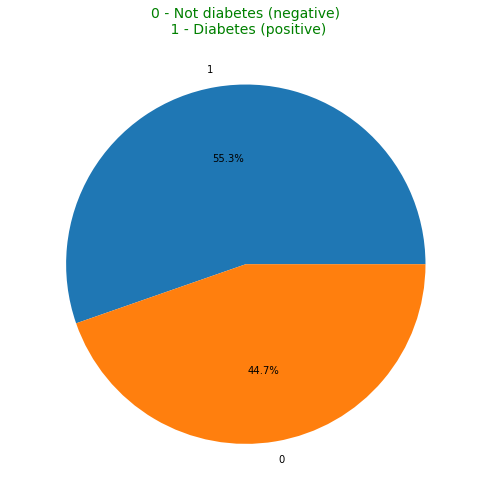

SVMModel Accuracy : 85.8695652174%
positive precision :  0.8520710059171598
negative precision :  0.8691588785046729
positive recall :  0.9113924050632911
negative recall :  0.788135593220339


D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



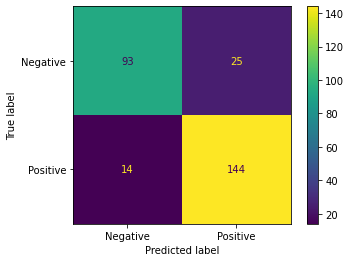

In [88]:
plt.figure(figsize=(7,7))
y.value_counts().plot.pie(ylabel=' ', autopct = '%0.1f%%')
plt.title(f'0 - Not diabetes (negative)\n 1 - Diabetes (positive)', size=14, c='green')
plt.tight_layout(); 
plt.show()

metrics.plot_confusion_matrix(SVMmodel, FSX_test, FSy_test, display_labels=['Negative', 'Positive'])

# confusion = metrics.confusion_matrix(FSy_test, y_pred)
# confusion.ravel() 

accuracy = metrics.accuracy_score(FSy_test, y_pred)
print("SVMModel Accuracy : %s" % "{0:.10%}".format(accuracy))

precision_positive = metrics.precision_score(FSy_test, y_pred, pos_label=1)
precision_negative = metrics.precision_score(FSy_test, y_pred, pos_label=0)
print("positive precision : ",precision_positive)
print("negative precision : ",precision_negative)

recall_sensitivity = metrics.recall_score(FSy_test, y_pred, pos_label=1)
recall_specificity = metrics.recall_score(FSy_test, y_pred, pos_label=0)
print("positive recall : ",recall_sensitivity)
print("negative recall : ",recall_specificity)

**Using XGBoost**

**XGBoost (Extreme Gradient Boosting) is a popular machine learning algorithm for solving classification and regression problems. It is an ensemble learning method that combines the predictions of multiple weak decision trees to make a final prediction. XGBoost is known for its high accuracy, scalability, and speed, and has won many machine learning competitions.**

**Here is the mathematical formula for XGBoost algorithm:**

**Given a training set of n examples, each with d features represented by X = {x_1, x_2, ..., x_d}, and a corresponding set of class labels Y = {y_1, y_2, ..., y_n}, the goal of the XGBoost algorithm is to build an ensemble of decision trees that can predict the class label y for a new input feature vector x.**

**The XGBoost algorithm works by iteratively adding decision trees to the ensemble. Each decision tree is trained to correct the mistakes of the previous trees, using a gradient descent optimization algorithm to minimize a loss function. The loss function measures the difference between the predicted class probabilities and the true class probabilities, and penalizes incorrect predictions.**

In [89]:
import xgboost
import matplotlib.pyplot as plt

XGBmodelafter = xgboost.XGBClassifier()

XGBmodelafter.fit(FSX_train,FSy_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [90]:
y_pred=XGBmodelafter.predict(FSX_test)

In [91]:
FSX_test

,Cholesterol,MaxHR,Oldpeak,ChestPainType,ExerciseAngina,Age,ST_Slope
293,0,93,0,0,1,65,1
682,319,152,0,1,0,58,2
301,0,150,0,1,0,55,2
591,213,110,0,0,0,58,2
835,239,126,2,0,1,54,1
...,...,...,...,...,...,...,...
322,0,166,2,0,0,38,2
53,245,150,0,1,0,41,2
113,297,150,0,1,0,38,2
178,194,150,0,2,0,37,2


In [92]:
FSy_test

293    1
682    1
301    0
591    0
835    1
      ..
322    1
53     0
113    0
178    0
107    0
Name: HeartDisease, Length: 276, dtype: int32

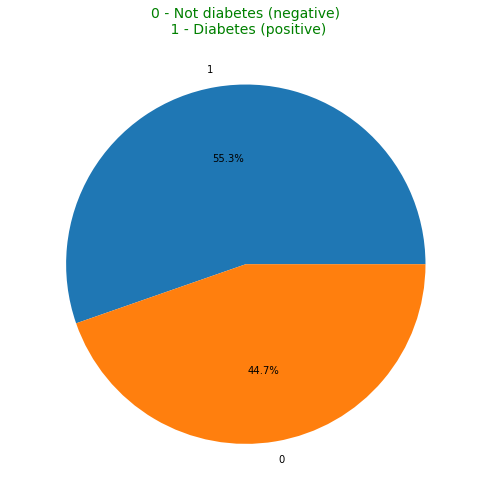

XGBModel Accuracy : 85.1449275362%
positive precision :  0.8461538461538461
negative precision :  0.8598130841121495
positive recall :  0.9050632911392406
negative recall :  0.7796610169491526


D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



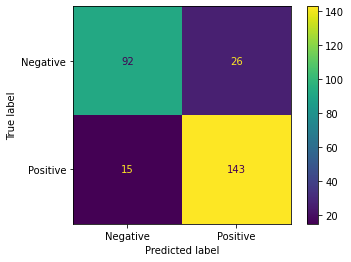

In [93]:
plt.figure(figsize=(7,7))
y.value_counts().plot.pie(ylabel=' ', autopct = '%0.1f%%')
plt.title(f'0 - Not diabetes (negative)\n 1 - Diabetes (positive)', size=14, c='green')
plt.tight_layout(); \
plt.show()

metrics.plot_confusion_matrix(XGBmodelafter, FSX_test, FSy_test, display_labels=['Negative', 'Positive'])

# confusion = metrics.confusion_matrix(FSy_test, y_pred)
# confusion.ravel() 

accuracy = metrics.accuracy_score(FSy_test, y_pred)
print("XGBModel Accuracy : %s" % "{0:.10%}".format(accuracy))

precision_positive = metrics.precision_score(FSy_test, y_pred, pos_label=1)
precision_negative = metrics.precision_score(FSy_test, y_pred, pos_label=0)
print("positive precision : ",precision_positive)
print("negative precision : ",precision_negative)

recall_sensitivity = metrics.recall_score(FSy_test, y_pred, pos_label=1)
recall_specificity = metrics.recall_score(FSy_test, y_pred, pos_label=0)
print("positive recall : ",recall_sensitivity)
print("negative recall : ",recall_specificity)

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



AdaBoost Accuracy : 82.9710144928%
positive precision :  0.8535031847133758
negative precision :  0.7983193277310925
positive recall :  0.8481012658227848
negative recall :  0.8050847457627118


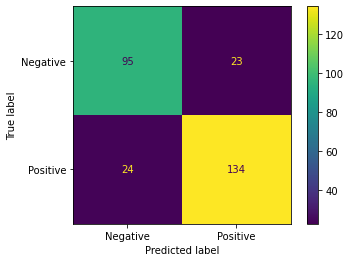

In [94]:
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(FSX_train, FSy_train)

#Predict the response for test dataset
y_pred = model.predict(FSX_test)

metrics.plot_confusion_matrix(model, FSX_test, FSy_test, display_labels=['Negative', 'Positive'])

accuracy = metrics.accuracy_score(FSy_test, y_pred)
print("AdaBoost Accuracy : %s" % "{0:.10%}".format(accuracy))

precision_positive = metrics.precision_score(FSy_test, y_pred, pos_label=1)
precision_negative = metrics.precision_score(FSy_test, y_pred, pos_label=0)
print("positive precision : ",precision_positive)
print("negative precision : ",precision_negative)

recall_sensitivity = metrics.recall_score(FSy_test, y_pred, pos_label=1)
recall_specificity = metrics.recall_score(FSy_test, y_pred, pos_label=0)
print("positive recall : ",recall_sensitivity)
print("negative recall : ",recall_specificity)

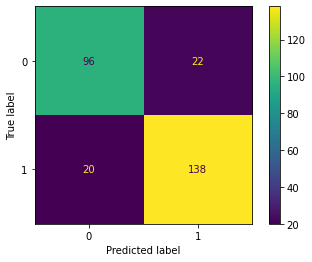

GBC accuracy is 0.85
positive precision :  0.8625
negative precision :  0.8275862068965517
positive recall :  0.8734177215189873
negative recall :  0.8135593220338984


In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import GradientBoostingClassifier

gd = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gd.fit(FSX_train, FSy_train)

cm = (confusion_matrix(FSy_test, gd.predict(FSX_test)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gd.classes_)
disp.plot()
plt.show()


# print("Gradient Boost Accuracy : %s" % "{0:.10%}".format(accuracy))
print("GBC accuracy is %2.2f" % metrics.accuracy_score( FSy_test, gd.predict(FSX_test)))

precision_positive = metrics.precision_score(FSy_test, gd.predict(FSX_test), pos_label=1)
precision_negative = metrics.precision_score(FSy_test, gd.predict(FSX_test), pos_label=0)
print("positive precision : ",precision_positive)
print("negative precision : ",precision_negative)

recall_sensitivity = metrics.recall_score(FSy_test, gd.predict(FSX_test), pos_label=1)
recall_specificity = metrics.recall_score(FSy_test, gd.predict(FSX_test), pos_label=0)
print("positive recall : ",recall_sensitivity)
print("negative recall : ",recall_specificity)

In [96]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier



abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
gnb = GaussianNB(var_smoothing=0.1)
dtc = DecisionTreeClassifier(max_depth=5,min_samples_split=2)
rfc = RandomForestClassifier(n_estimators=50,max_depth=5,min_samples_split=2)
xgb = XGBClassifier()
# svm = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
#   decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
#   max_iter=-1, probability=True, random_state=1, shrinking=True,
#   tol=0.001, verbose=False)
svm = SVC(probability=True)
knn = KNeighborsClassifier(n_neighbors=3)
gd = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(FSX_train, FSy_train)

# ensemble_clf = VotingClassifier(estimators=[('svm', svm),('abc', abc),('gd',gd),('xgb', xgb)], voting='hard')
ensemble_clf = VotingClassifier(estimators=[('svm', svm),('xgb', xgb)], voting='hard')

ensemble_clf.fit(FSX_train,FSy_train)

# svm.fit(ensemble_clf.predict_proba(FSX_train), FSy_train)

y_pred = ensemble_clf.predict(FSX_test)

Our Model Accuracy : 81.5217391304%
positive precision :  0.9083969465648855
negative precision :  0.7310344827586207
positive recall :  0.7531645569620253
negative recall :  0.8983050847457628


D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



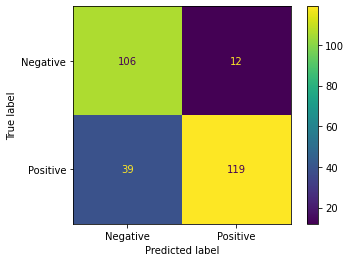

In [97]:
from sklearn import metrics

# plt.figure(figsize=(7,7))
# y.value_counts().plot.pie(ylabel=' ', autopct = '%0.1f%%')
# plt.title(f'0 - Not diabetes (negative)\n 1 - Diabetes (positive)', size=14, c='green')
# plt.tight_layout(); \
# plt.show()

metrics.plot_confusion_matrix(ensemble_clf, FSX_test, FSy_test, display_labels=['Negative', 'Positive'])

# confusion = metrics.confusion_matrix(FSy_test, y_pred)
# confusion.ravel() 

accuracy = metrics.accuracy_score(FSy_test, y_pred)
print("Our Model Accuracy : %s" % "{0:.10%}".format(accuracy))

precision_positive = metrics.precision_score(FSy_test, y_pred, pos_label=1)
precision_negative = metrics.precision_score(FSy_test, y_pred, pos_label=0)
print("positive precision : ",precision_positive)
print("negative precision : ",precision_negative)

recall_sensitivity = metrics.recall_score(FSy_test, y_pred, pos_label=1)
recall_specificity = metrics.recall_score(FSy_test, y_pred, pos_label=0)
print("positive recall : ",recall_sensitivity)
print("negative recall : ",recall_specificity)

In [98]:
print(metrics.classification_report(FSy_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.90      0.81       118
           1       0.91      0.75      0.82       158

    accuracy                           0.82       276
   macro avg       0.82      0.83      0.81       276
weighted avg       0.83      0.82      0.82       276



In [99]:
import pickle;
filename='trained_model.sav'
pickle.dump(ensemble_clf,open(filename,'wb'))

In [100]:
# loaded_model=pickle.load(open('trained_model.sav','rb'));